# OpenCV 사용법
## 1. 개요
- 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리
- C, C++, Python 등에서 사용 가능
- 설치: pip install opencv-python
## 2. 이미지 읽어서 살펴보기
- cv2.imread(file_name, flag)
1. 이미지를 읽어 Numpy 객체로 만드는 함수
2. file_name: 읽고자 하는 이미지 파일
flag: 이미지를 읽는 방법 설정
IMREAD_COLOR: 이미지를 Color로 읽고, 투명한 부분은 무시
IMREAD_GRAYSCALE: 이미지를 Grayscale로 읽기
IMREAD_UNCHANGED: 이미지를 Color로 읽고, 투명한 부분도 읽기(Alpha)
반환 값: Numpy 객체(행, 열, 색상: 기본 BGR)
Jupyter Notebook 사용시에는 plt.imread()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

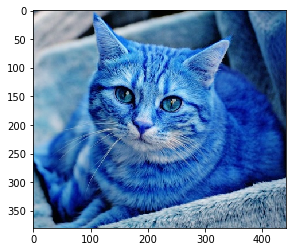

In [3]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(image)    # Numpy객체로 불러들일때 기본 BGR이기 떄문에 색 변함

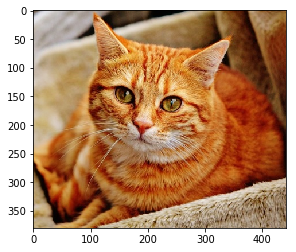

In [6]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     # BGR -> RGB로 색 원래대로
plt.imshow(cat)

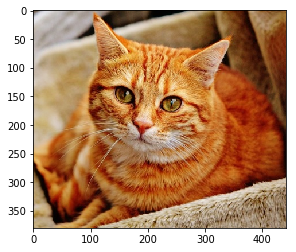

In [7]:
b, g, r = cv2.split(image)   # img파일을 b,g,r로 분리
image = cv2.merge([r,g,b])   # b, r을 바꿔서 Merge
plt.imshow(image)

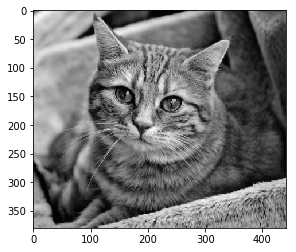

In [8]:
# Gray Scale Image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap=plt.get_cmap('gray'))
# cmap=plt.get_cmap('gray') <-  완벽한 흑백으로 나옴

In [10]:
image = cv2.imread('images/image_2.png')
print(image.shape)     # 픽셀 수
print(image.size)        # 이미지 크기 (720 x 1280)

(720, 1280, 3)
2764800


In [11]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.017000913619995117 seconds ---


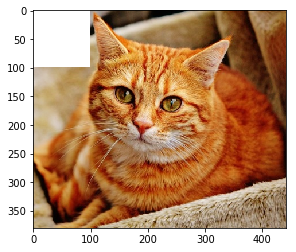

In [12]:
# cv2.imshow('Image', image)
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage)

In [13]:
# Numpy 슬라이싱 으로 이미지 변경
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


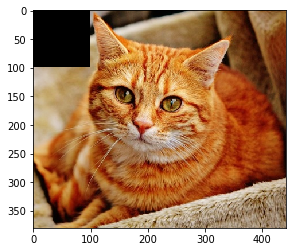

In [15]:
plt.imshow(basicImage)

- 이미지 크기 조절
- cv2.resize(image, dsize, fx, fy, interpolation)
- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법
- INTER_CUBIC: 사이즈를 크게 할 때 주로 사용
- INTER_AREA: 사이즈를 작게 할 때 주로 사용

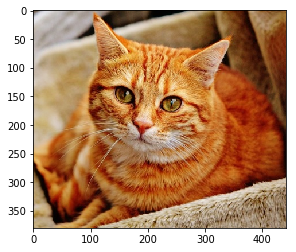

In [23]:
image = cv2.imread('images/cat.jpg')

expand = cv2.resize(image, None, fx=5.0, fy=5.0, 
                    interpolation=cv2.INTER_CUBIC)
# cv2.imshow('Image', expand)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

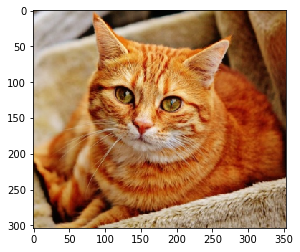

In [20]:
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, 
                    interpolation=cv2.INTER_AREA)
# cv2.imshow('Image', shrink)
plt.imshow(shrink)

In [26]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]
height, width

(380, 441)

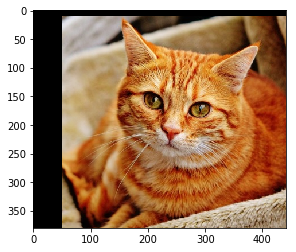

In [27]:
M = np.float32([[1, 0, 50], [0, 1, 10]])
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

In [29]:
image = cv2.imread('images/cat.jpg')
# 행과 열 정보만 저장
height, width = image.shape[:2]
height, width

(380, 441)

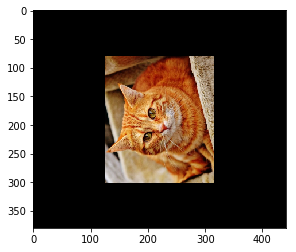

In [30]:
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
# cv2.imshow('Image', dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)

In [31]:
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

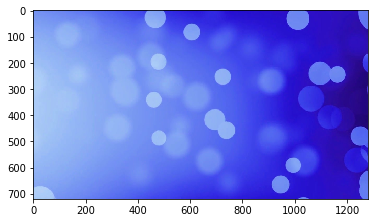

In [40]:
plt.imshow(image_1)

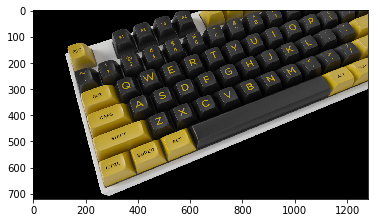

In [39]:
plt.imshow(image_2)

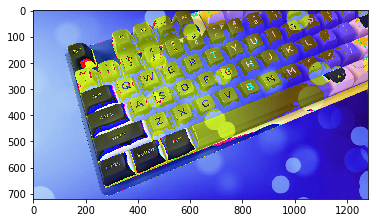

In [47]:
result1 = cv2.add(image_1, image_2)
# cv2.imshow('Image', result)
result1 = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result1)

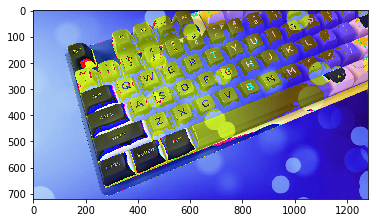

In [45]:
result2 = image_1 + image_2
# cv2.imshow('Image', result)
result2 = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result2)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


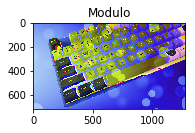

In [46]:
plt.subplot(122)
plt.title("Saturation")
plt.imshow(result1)

plt.subplot(122)
plt.title("Modulo")
plt.imshow(result2)

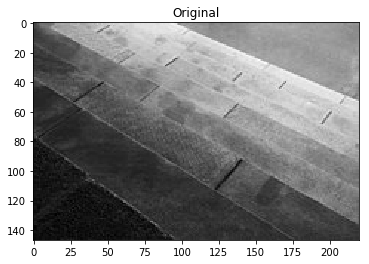

In [48]:
basic = cv2.imread('images/gray_image.jpg', cv2.IMREAD_GRAYSCALE)
plt.title('Original')
plt.imshow(basic, cmap=plt.get_cmap('gray'))

In [49]:
grey1 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY)
grey2 = cv2.threshold(basic, 127, 255, cv2.THRESH_BINARY_INV)
grey3 = cv2.threshold(basic, 127, 255, cv2.THRESH_TRUNC)
grey4 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO)
grey5 = cv2.threshold(basic, 127, 255, cv2.THRESH_TOZERO_INV)

In [50]:
grey1

(127.0, array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

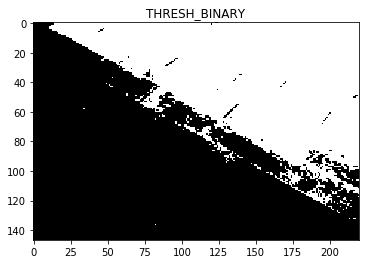

In [51]:
plt.title('THRESH_BINARY')
plt.imshow(grey1[1], cmap=plt.get_cmap('gray'))